# Vivek Joshi

<h2>Linear Regression with Python scikit</h2>

In this project we will use Python Scikit-Learn library for machine learning to implement regression functions.

__Simple linear regression__ 

In this project we will predict the percentage of marks that are expected by a student after analysing the hour-percentage relation.
This is a simple linear regression based project which involves only two variables ( hours of study and percentage obtained ).

In [73]:
#importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
#reading data form web
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

data = pd.read_csv(url)
print("data is imported")

#printing a part of data for test 
data.head(8)

data is imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


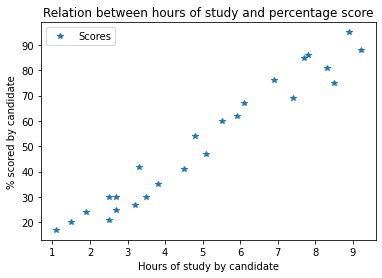

In [76]:
#ploting our data for a brief idea about the realtion between data items
data.plot(x = 'Hours', y = 'Scores', style = '*' )
plt.ylabel('% scored by candidate')
plt.xlabel('Hours of study by candidate')
plt.title('Relation between hours of study and percentage score')
plt.show()

__Lets prepare our data for the model 

we have to divide the data into attributes and labels 

In [77]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Now we have our inputs( attributes ) and outputs( labels )
Next we have to split our data into training and test sets. 
We will do this by Scikit-Learn's built-in train_test_split() method

In [78]:
from sklearn.model_selection import train_test_split
x_Train , x_test, y_Train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

Now we will train our model for predictions

In [79]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_Train, y_Train)

print("Model training is completed")

Model training is completed


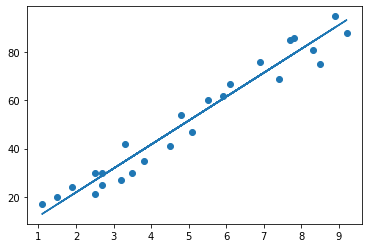

In [80]:
#Now its time for plotting the regression line
line = regressor.coef_ * x + regressor.intercept_

#plotting test data
plt.scatter(x,y)
plt.plot(x, line)
plt.show()

now its time to make some predictions

In [81]:
#x_test is out testing data in hours
print(x_test)
y_predicted = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [82]:
#lets compare actual and predicted percentage 
df = pd.DataFrame({'Actual percentage': y_test, 'Predicted percentage': y_predicted})
df

,Actual percentage,Predicted percentage
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [83]:
#lets give some of our own data for prediction
hours = 10
my_predic = regressor.predict([[hours]])
print( my_predic[0])


101.34898764803259


Lets evaluate our model by mean square error method

In [84]:
from sklearn import metrics
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_predicted))

Mean Absolute Error 4.130879918502486
